# Results of Treatments Targeting Squamous Cell Carcinoma

### Study Design
* 10 groups of 25-26 mice each were administered nine different drug treatment regimes and placebo over the course of 45 days.
* Physiological responses, including change in tumor volume (mm3), number of metastatic sites, and mouse mortality were monitored and recorded at five day intervals during the course of treatment. 
* This analysis will focus on three of those treatments (Capomulin, Infubinol, Ketapril) compared to placebo.
   

### Tumor Response to Treatment

* Capomulin showed immediate, steady, and significant reductions in tumor volume over the 45 day period.

* After just five days, the mice on Capomulin were already showing reductions in tumor volume, while mice on the other two therapies and placebo had increased tumor volumes.

* Capomulin treatment resulted in an average 19% reduction in tumor volume by the end of the 45 days.  The reduction in Capomulin compared to placebo was significant, as evidenced by the 95% confidence interval lines in figure 2, which do not overlap with the placebo confidence intervals through most of the treatment period.

* Infubinol and Ketapril treatments did not show a significant difference from Placebo throughout the entire 45 day period, as indicated by the overlapping standard error of the means between Infubinol, Placebo, and Ketapril in figure 1.

<img style="float: left;" src="Tumor Response To Treatment (SEM).png" width="45%"/><img style="right;" src="Tumor Response To Treatment (95% CI).png"  width="45%"/>


### Metastatic Spread During Treatment 

* Capumolin was the most effective at controlling the spread of metastatic sites, limiting spread to a mean of less than 1.5 sites by the end of the 45 day period.  However, we cannot say that Capomulin is significantly better than Placebo on this measure, as indicated by the overalapping 95% confidence intervals (Capomulin upper 95% CI = 3.0 and Placebo lower 95% CI = 1.25 at day 45).

* Infubinol also appears to have controlled metastatic spread, however the upper 95% confidence intervals for the drug also show overlap with placebo, so we cannot say that the difference was significant.  In fact, figure 4 shows overlap of the confidence intervals between all four treatments.

* Ketapril's standard error of the mean overlaps with placebo, as seen in figure 3, indicating that there was not a significant difference between the drug and placebo throughout the entire course of treatment.

<img style="float: left;" src="Metastatic Spread During Treatment (SEM).png" width="45%"/><img style="right;" src="Metastatic Spread During Treatment (95% CI).png" width="45%"/>


### Survival During Treatment

* Mice given Capomulin as treatment had a 84% survival rate at the end of the 45 day period.

* Mice given Infubinol, Ketapril or placebo had a survival rate of 44% or lower.

<img style="left;" src="Survival During Treatment.png" width="55%"/>


### Tumor Change Over 45 Day Treatment

* Capumolin yeilded an average 19% reduction in tumor volume over the 45 days of treatment, making it the only successful treatment of the three drugs administered, and significantly more successful than placebo.

* Mice that were administered Infubinol, Ketapril or Placebo had an average increase in tumor volume of between 46% and 57%.

<img style="left;" src="Tumor Change Over 45 Day Treatment.png"  width="55%"/>


### Future Studies

* The small size of each cohort (25-26 mice) contributed to greater uncertainty in the results of the study, as evidenced by the wide range for the 95% confidence intervals.  This was most apparent in the metastatic spread, where the confidence intervals overlapped between Capomulin and Placebo in figure 4.
* Using a similar total sample of 250 mice, future studies could narrow the number of treatments and use larger sample sizes per treatment to yield results with less uncertainty.
* While this study focused solely on the results of Capomulin, Infubinol and Ketapril, it is worth noting that mice treated with Ramicane had similarly successful results to those of Capomulin, as seen in figure 7, and should be studied further.

<img style="left;" src="Tumor Response To Treatment (incl. Ramicane).png"  width="55%"/>

In [92]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pylab as plb
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combo_df = pd.merge(clinical_trial_df, mouse_drug_df, on="Mouse ID")

# Display the data table for preview
combo_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [93]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_vol_group = combo_df[['Drug','Timepoint','Tumor Volume (mm3)']].groupby(['Drug','Timepoint']).mean()

# Convert to DataFrame
mean_tumor_vol_df = mean_tumor_vol_group.reset_index()

# Preview DataFrame
mean_tumor_vol_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [94]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_vol_group = combo_df[['Drug','Timepoint','Tumor Volume (mm3)']].groupby(['Drug','Timepoint']).sem()

# Convert to DataFrame
sem_tumor_vol_df = sem_tumor_vol_group.reset_index()

# Preview DataFrame
sem_tumor_vol_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [95]:
# Store the 95% Confidence Intervals Grouped by Drug and Timepoint
p025_tumor_vol_group = combo_df[['Drug','Timepoint','Tumor Volume (mm3)']].groupby(['Drug','Timepoint']).quantile(0.025)
p975_tumor_vol_group = combo_df[['Drug','Timepoint','Tumor Volume (mm3)']].groupby(['Drug','Timepoint']).quantile(0.975)

# Convert to DataFrame
p025_tumor_vol_df = p025_tumor_vol_group.reset_index()
p975_tumor_vol_df = p975_tumor_vol_group.reset_index()

# Preview DataFrame
p025_tumor_vol_df.head()
p975_tumor_vol_df.head()

0.975,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,45.894491
2,Capomulin,10,46.753033
3,Capomulin,15,47.422373
4,Capomulin,20,48.109943


In [96]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_vol_pivot_df = mean_tumor_vol_df.pivot_table(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
sem_tumor_vol_pivot_df = sem_tumor_vol_df.pivot_table(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
p025_tumor_vol_pivot_df = p025_tumor_vol_df.pivot_table(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
p975_tumor_vol_pivot_df = p975_tumor_vol_df.pivot_table(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')


# Preview that Reformatting worked
#mean_tumor_vol_pivot_df.head()
#sem_tumor_vol_pivot_df.head()
p025_tumor_vol_pivot_df.head()
p975_tumor_vol_pivot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,45.894491,47.964094,49.299936,49.241441,49.004825,48.891657,49.464742,45.861936,49.258887,49.066907
10,46.753033,50.121406,51.674746,52.462729,51.739997,52.614387,53.098984,46.414974,53.435425,50.986086
15,47.422373,52.507827,54.131138,57.257497,55.148811,56.589125,54.129963,47.062591,55.553475,53.805243
20,48.109943,54.778081,56.032958,61.022891,58.799876,61.567912,56.837092,46.321395,59.215927,57.541440


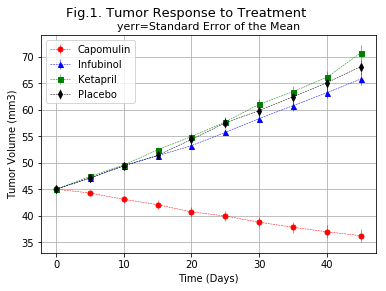

In [97]:
# select subset of drugs to plot
mean_tumor_vol_short_list_df = mean_tumor_vol_pivot_df[['Capomulin','Infubinol','Ketapril','Placebo']]
sem_tumor_vol_short_list_df = sem_tumor_vol_pivot_df[['Capomulin','Infubinol','Ketapril','Placebo']]

# Generate the Plot (with SEM Error Bars)

drugs = list(['Capomulin','Infubinol','Ketapril','Placebo'])
colors = list(['r','b','g','k'])
markers = list(['o','^','s','d'])

fig, ax = plt.subplots()
ax.grid()

for drug,color,marker in zip(drugs,colors,markers):
    
    ax.errorbar(mean_tumor_vol_short_list_df.index,
                mean_tumor_vol_short_list_df[drug],
                yerr=sem_tumor_vol_short_list_df[drug],
                markersize=5,
                linewidth=0.5,
                linestyle='--',
                color=color,
                ecolor=color,
                marker=marker
               )
      
plt.suptitle('Fig.1. Tumor Response to Treatment', x=.46, fontsize=13) 
plt.title('yerr=Standard Error of the Mean', fontsize=11)
plt.legend(loc="best", fancybox=True)
plt.xlabel("Time (Days)", fontsize=10)
plt.ylabel("Tumor Volume (mm3)", fontsize=10)
plt.ylim(33,74)

# Save the Figure
plt.savefig("Tumor Response to Treatment (SEM).png")

# Show the Figure
plt.show()

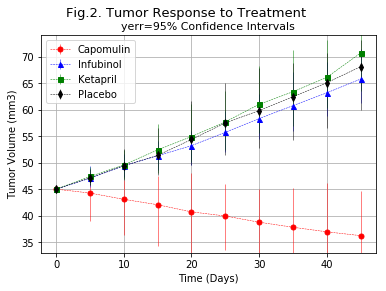

In [98]:
# select subset of drugs to plot
mean_tumor_vol_short_list_df = mean_tumor_vol_pivot_df[['Capomulin','Infubinol','Ketapril','Placebo']]
p025_tumor_vol_short_df = p025_tumor_vol_pivot_df[['Capomulin','Infubinol','Ketapril','Placebo']]
p975_tumor_vol_short_df = p975_tumor_vol_pivot_df[['Capomulin','Infubinol','Ketapril','Placebo']]

# Generate the Plot (with 95% CI Error Bars)

drugs = list(['Capomulin','Infubinol','Ketapril','Placebo'])
colors = list(['r','b','g','k'])
markers = list(['o','^','s','d'])

fig, ax = plt.subplots()
ax.grid()

for drug,color,marker in zip(drugs,colors,markers):
    
    ax.errorbar(mean_tumor_vol_short_list_df.index,
                mean_tumor_vol_short_list_df[drug],
                yerr=[mean_tumor_vol_short_list_df[drug]-p025_tumor_vol_short_df[drug], p975_tumor_vol_short_df[drug]-mean_tumor_vol_short_list_df[drug]],
                markersize=5,
                linewidth=0.5,
                linestyle='--',
                color=color,
                ecolor=color,
                marker=marker
               )

plt.suptitle("Fig.2. Tumor Response to Treatment", x=0.46, fontsize=13)
plt.title("yerr=95% Confidence Intervals", fontsize=11)
plt.legend(loc="best", fancybox=True)
plt.xlabel("Time (Days)", fontsize=10)
plt.ylabel("Tumor Volume (mm3)", fontsize=10)
plt.ylim(33,74)

# Save the Figure
plt.savefig("Tumor Response to Treatment (95% CI).png")

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [99]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_site_group = combo_df[['Drug','Timepoint','Metastatic Sites']].groupby(['Drug','Timepoint']).mean()


# Convert to DataFrame
mean_met_site_df = mean_met_site_group.reset_index()

# Preview DataFrame
mean_met_site_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [100]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_met_site_group = combo_df[['Drug','Timepoint','Metastatic Sites']].groupby(['Drug','Timepoint']).sem()

# Convert to DataFrame
sem_met_site_df = sem_met_site_group.reset_index()

# Preview DataFrame
sem_met_site_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [101]:
# Store the 95% Confidence Intervals Grouped by Drug and Timepoint
p025_met_site_group = combo_df[['Drug','Timepoint','Metastatic Sites']].groupby(['Drug','Timepoint']).quantile(0.025)
p975_met_site_group = combo_df[['Drug','Timepoint','Metastatic Sites']].groupby(['Drug','Timepoint']).quantile(0.975)

# Convert to DataFrame
p025_met_site_df = p025_met_site_group.reset_index()
p975_met_site_df = p975_met_site_group.reset_index()

# Preview DataFrame
p025_met_site_df.head()
p975_met_site_df.head()

0.975,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.0
1,Capomulin,5,1.0
2,Capomulin,10,2.0
3,Capomulin,15,2.0
4,Capomulin,20,2.0


In [102]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_site_pivot_df = mean_met_site_df.pivot_table(index='Timepoint', columns='Drug', values='Metastatic Sites')
sem_met_site_pivot_df = sem_met_site_df.pivot_table(index='Timepoint', columns='Drug', values='Metastatic Sites')
p025_met_site_pivot_df = p025_met_site_df.pivot_table(index='Timepoint', columns='Drug', values='Metastatic Sites')
p975_met_site_pivot_df = p975_met_site_df.pivot_table(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
#mean_met_site_pivot_df.head()
#sem_met_site_pivot_df.head()
p025_met_site_pivot_df
#p975_met_site_pivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.0,0.000,0.0,0.0,0.00,0.000,0.000,0.0,0.000,0.000
5,0.0,0.000,0.0,0.0,0.00,0.000,0.000,0.0,0.000,0.000
10,0.0,0.000,0.0,0.0,0.00,0.000,0.000,0.0,0.000,0.000
15,0.0,0.000,0.0,0.0,0.00,0.000,0.000,0.0,0.000,0.000
20,0.0,0.000,0.0,0.0,0.00,0.000,0.000,0.0,0.000,0.400
25,0.0,0.000,0.0,0.0,0.00,0.000,0.325,0.0,0.000,0.375
30,0.0,0.375,0.4,0.0,0.35,0.350,0.300,0.0,0.000,1.000
35,0.0,1.000,1.0,0.0,0.35,0.325,1.000,0.0,0.000,1.000
40,0.0,1.000,1.0,1.0,1.00,1.275,1.000,0.0,0.275,1.000


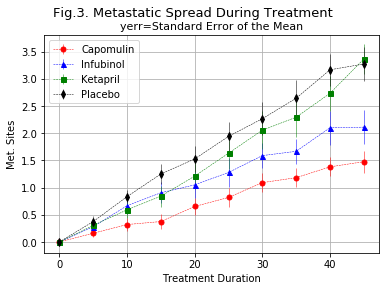

In [103]:
# select subset of drugs to plot
mean_met_site_short_list_df = mean_met_site_pivot_df[['Capomulin','Infubinol','Ketapril','Placebo']]
sem_met_site_short_list_df = sem_met_site_pivot_df[['Capomulin','Infubinol','Ketapril','Placebo']]

# Generate the Plot (with SEM Error Bars)

drugs = list(['Capomulin','Infubinol','Ketapril','Placebo'])
colors = list(['r','b','g','k'])
markers = list(['o','^','s','d'])

fig, ax = plt.subplots()
ax.grid()

for drug,color,marker in zip(drugs,colors,markers):
    
    ax.errorbar(mean_met_site_short_list_df.index,
                mean_met_site_short_list_df[drug],
                yerr=sem_met_site_short_list_df[drug],
                markersize=5,
                linewidth=0.5,
                linestyle='--',
                color=color,
                ecolor=color,
                marker=marker
               )

plt.suptitle('Fig.3. Metastatic Spread During Treatment', x=.47, fontsize=13)
plt.title('yerr=Standard Error of the Mean', fontsize=11)        
plt.legend(loc="best", fancybox=True)
plt.xlabel("Treatment Duration", fontsize=10)
plt.ylabel("Met. Sites", fontsize=10)
plt.ylim(-0.2,3.8)

# Save the Figure
plt.savefig("Metastatic Spread During Treatment (SEM).png")

# Show the Figure
plt.show()

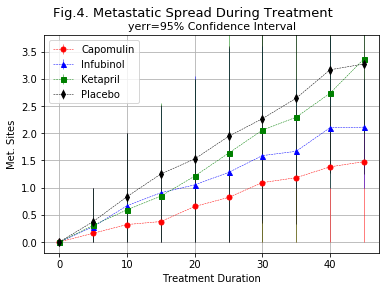

In [104]:
# select subset of drugs to plot
mean_met_site_short_list_df = mean_met_site_pivot_df[['Capomulin','Infubinol','Ketapril','Placebo']]
p025_met_site_short_df = p025_met_site_pivot_df[['Capomulin','Infubinol','Ketapril','Placebo']]
p975_met_site_short_df = p975_met_site_pivot_df[['Capomulin','Infubinol','Ketapril','Placebo']]

# Generate the Plot (with 95% CI Error Bars)

drugs = list(['Capomulin','Infubinol','Ketapril','Placebo'])
colors = list(['r','b','g','k'])
markers = list(['o','^','s','d'])

fig, ax = plt.subplots()
ax.grid()

for drug,color,marker in zip(drugs,colors,markers):
    
    ax.errorbar(mean_met_site_short_list_df.index,
                mean_met_site_short_list_df[drug],
                yerr=[mean_met_site_short_list_df[drug]-p025_met_site_short_df[drug], p975_met_site_short_df[drug]-mean_met_site_short_list_df[drug]],
                markersize=5,
                linewidth=0.5,
                linestyle='--',
                color=color,
                ecolor=color,
                marker=marker
               )
      
plt.suptitle("Fig.4. Metastatic Spread During Treatment", x=0.47, fontsize=13)
plt.title("yerr=95% Confidence Interval", fontsize=11)
plt.legend(loc="best", fancybox=True)
plt.xlabel("Treatment Duration", fontsize=10)
plt.ylabel("Met. Sites", fontsize=10)
plt.ylim(-0.2, 3.8)

# Save the Figure
plt.savefig("Metastatic Spread During Treatment (95% CI).png")

# Show the Figure
plt.show()

## Survival Rates

In [105]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count_group = combo_df[['Drug','Timepoint','Mouse ID']].groupby(['Drug','Timepoint']).count()

# Convert to DataFrame
mouse_count_df = mouse_count_group.reset_index()
mouse_count_df = mouse_count_df.rename(columns = {'Mouse ID':'Mouse Count'})

# Preview DataFrame
mouse_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [106]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_pivot_df = mouse_count_df.pivot_table(index='Timepoint', columns='Drug', values='Mouse Count')

# Preview that Reformatting worked
mouse_count_pivot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


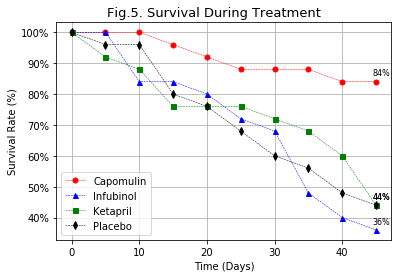

In [107]:
# select subset of drugs to plot
mouse_count_short_list_df = mouse_count_pivot_df[['Capomulin','Infubinol','Ketapril','Placebo']]

# change value from count to percent of starting count in dataframe
pct_mouse_count_df = mouse_count_short_list_df/(mouse_count_short_list_df.iloc[0])*100

# Generate the Plot (Accounting for percentages)
drugs = list(['Capomulin','Infubinol','Ketapril','Placebo'])
colors = list(['r','b','g','k'])
markers = list(['o','^','s','d'])

fig, ax = plt.subplots()
ax.grid()

for drug,color,marker in zip(drugs,colors,markers):
    
    ax.errorbar(pct_mouse_count_df.index,
                pct_mouse_count_df[drug],
                markersize=5,
                linewidth=0.5,
                linestyle='--',
                color=color,
                marker=marker
               )

plt.title('Fig.5. Survival During Treatment', x=0.47, fontsize=13)        
plt.legend(loc="lower left", fancybox=True)
plt.xlabel("Time (Days)", fontsize=10)
plt.ylabel("Survival Rate (%)", fontsize=10)
yticks = mtick.FormatStrFormatter('%.0f%%')
ax.yaxis.set_major_formatter(yticks)

for j in pct_mouse_count_df.iloc[9]:
     ax.annotate(str('{:.0f}'.format(j))+'%',xy=(44.5,j+2), fontsize=8)

# Save the Figure
plt.savefig("Survival During Treatment.png")

# # Show the Figure
plt.show()

## Summary Bar Graph

In [108]:
# Calculate the percent changes for each drug
pct_tumor_vol_change = (mean_tumor_vol_pivot_df.iloc[9]/(mean_tumor_vol_pivot_df.iloc[0])-1)*100

# Display the data to confirm
pct_tumor_vol_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

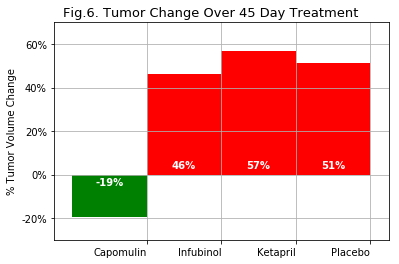

In [109]:
# Store all Relevant Percent Changes into a Tuple
pct_change = pct_tumor_vol_change[['Capomulin','Infubinol','Ketapril','Placebo']]

# Slice the data between passing and failing drugs
drug_pass = pct_change < 0

# Plot the percent change
ax = pct_change.plot(kind='bar',
                #figsize=(5,3),
                grid=True,
                color=drug_pass.map({True: 'g', False: 'r'}),
                rot=0,
                align='edge',
                width=-1,
                )

# Add labels, tick marks, etc. 
plt.title('Fig.6. Tumor Change Over 45 Day Treatment', x=0.47, fontsize=13)        
plt.ylabel("% Tumor Volume Change", fontsize=10)
plt.xlabel("")
plt.xlim(-1.25, 3.25)
plt.ylim(-30, 70)

ax.set_xticklabels(ax.get_xticklabels(), ha='right')

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)

yticks = mtick.FormatStrFormatter('%.0f%%')
ax.yaxis.set_major_formatter(yticks)

#Use functions to label the percentages of changes
def autolabel(rects):
    for rect in enumerate(rects):
        height = rect[1]
                
        if height > 0:
            label_position = 3
        else:
            label_position = -5
    
        ax.text(rect[0]-0.5, label_position,
                '%d' % int(height) + '%',
                 color='white',
                 weight='bold',
                 ha='center')

# Call functions to implement the function calls
autolabel(pct_change)
                
# Save the Figure
plt.savefig("Tumor Change Over 45 Day Treatment.png")

# Show the Figure
plt.show()

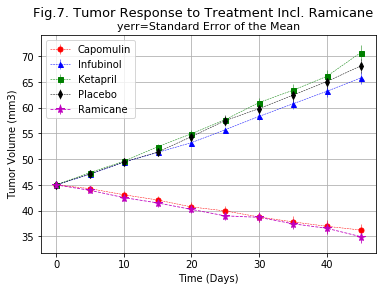

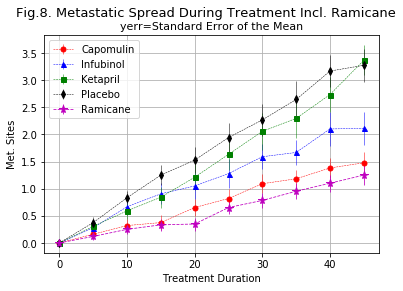

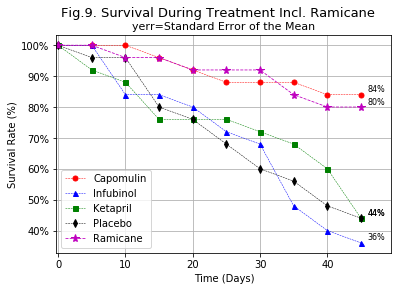

In [110]:
# select subset of drugs to plot
mean_tumor_vol_incl_ramicane_df = mean_tumor_vol_pivot_df[['Capomulin','Infubinol','Ketapril','Placebo','Ramicane']]
sem_tumor_vol_incl_ramicane_df = sem_tumor_vol_pivot_df[['Capomulin','Infubinol','Ketapril','Placebo','Ramicane']]

# Generate the Tumor Volume plot (with Error Bars) incl. Ramicane

drugs = list(['Capomulin','Infubinol','Ketapril','Placebo','Ramicane'])
colors = list(['r','b','g','k','m'])
markers = list(['o','^','s','d','*'])
mks = list([5,5,5,5,8])
lws = list([0.5,0.5,0.5,0.5,0.8])

fig, ax = plt.subplots()
ax.grid()

for drug,color,marker,mk,lw in zip(drugs,colors,markers,mks,lws):
    
    ax.errorbar(mean_tumor_vol_incl_ramicane_df.index,
                mean_tumor_vol_incl_ramicane_df[drug],
                yerr=sem_tumor_vol_incl_ramicane_df[drug],
                markersize=mk,
                linewidth=lw,
                linestyle='--',
                color=color,
                ecolor=color,
                marker=marker
               )
      

plt.suptitle('Fig.7. Tumor Response to Treatment Incl. Ramicane', fontsize=13)
plt.title('yerr=Standard Error of the Mean', fontsize=11)
plt.legend(loc="best", fancybox=True)
plt.xlabel("Time (Days)", fontsize=10)
plt.ylabel("Tumor Volume (mm3)", fontsize=10)

# Save the Figure
plt.savefig("Tumor Response to Treatment (incl. Ramicane).png")

# Show the Figure# select subset of drugs to plot
mean_met_site_incl_ramicane_df = mean_met_site_pivot_df[['Capomulin','Infubinol','Ketapril','Placebo','Ramicane']]
sem_met_site_incl_ramicane_df = sem_met_site_pivot_df[['Capomulin','Infubinol','Ketapril','Placebo','Ramicane']]

# Generate the Metastatic Site plot (with Error Bars) incl. Ramicane
fig, ax = plt.subplots()
ax.grid()

for drug,color,marker,mk,lw in zip(drugs,colors,markers,mks,lws):
    
    ax.errorbar(mean_met_site_incl_ramicane_df.index,
                mean_met_site_incl_ramicane_df[drug],
                yerr=sem_met_site_incl_ramicane_df[drug],
                markersize=mk,
                linewidth=lw,
                linestyle='--',
                color=color,
                ecolor=color,
                marker=marker
               )

plt.suptitle('Fig.8. Metastatic Spread During Treatment Incl. Ramicane', fontsize=13)
plt.title('yerr=Standard Error of the Mean', fontsize=11)
plt.legend(loc="best", fancybox=True)
plt.xlabel("Treatment Duration", fontsize=10)
plt.ylabel("Met. Sites", fontsize=10)

# Save the Figure
plt.savefig("Metastatic Spread During Treatment (incl. Ramicane).png")

# Show the Figure
plt.show()

# select subset of drugs to plot
mouse_count_short_list_df = mouse_count_pivot_df[['Capomulin','Infubinol','Ketapril','Placebo','Ramicane']]

# change value from count to percent of starting count in dataframe
pct_mouse_count_df = mouse_count_short_list_df/(mouse_count_short_list_df.iloc[0])*100

# Generate the Survival Rate Plot incl. Ramicane
fig, ax = plt.subplots()
ax.grid()

for drug,color,marker,mk,lw in zip(drugs,colors,markers,mks,lws):
    
    ax.errorbar(pct_mouse_count_df.index,
                pct_mouse_count_df[drug],
                markersize=mk,
                linewidth=lw,
                linestyle='--',
                color=color,
                marker=marker
               )

plt.suptitle('Fig.9. Survival During Treatment Incl. Ramicane', fontsize=13)        
plt.title('yerr=Standard Error of the Mean', fontsize=11)
plt.legend(loc="lower left", fancybox=True)
plt.xlabel("Time (Days)", fontsize=10)
plt.ylabel("Survival Rate (%)", fontsize=10)
yticks = mtick.FormatStrFormatter('%.0f%%')
ax.yaxis.set_major_formatter(yticks)
plt.xlim(-0.25,49.5)

for j in pct_mouse_count_df.iloc[9]:
     ax.annotate(str('{:.0f}'.format(j))+'%',xy=(46,j+1), fontsize=8)

# Save the Figure
plt.savefig("Survival During Treatment (incl. Ramicane).png")

# Show the Figure
plt.show()